<a href="https://colab.research.google.com/github/Koanah/Housing-Prices-EDA/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Core data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning (used later)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



## 1. Dataset Acquisition

The dataset used is the **House Prices: Advanced Regression Techniques** dataset
from Kaggle. It contains detailed information about residential properties in
Ames, Iowa.

- `train.csv` contains the features and the target variable (`SalePrice`)
- `test.csv` contains features only and is used for prediction in competitions


In [3]:
# make sure to direct the program to where the files are located on your machine
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# file paths (adjust if your folder name is different)
train_path = "/content/drive/MyDrive/train.csv"
test_path = "/content/drive/MyDrive/test.csv"

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Preview of the training data
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Each row represents a house sale.
The dataset includes numerical features (e.g. living area, year built),
categorical features (e.g. neighborhood, house style),
and the target variable `SalePrice`, which represents the final selling price.


In [30]:
test_df.head()
# The test data only contains features , without the final saleprice


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#DATA STRUCTURE

In [31]:
# Shape of the dataset
train_df.shape


(1460, 81)

There are 1,460 individual houses or records in the dataset. AND
81 Columns (Features) or characteristics recorded for each house.

In [32]:
# Data types and non-null counts
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
# Random sample of records
train_df.sample(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
493,494,20,RL,70.0,7931,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1960,1960,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,374,LwQ,532,363,1269,GasA,TA,Y,FuseA,1269,0,0,1269,0,0,1,1,3,1,TA,6,Typ,1,Fa,Detchd,1964.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,155000
299,300,20,RL,80.0,14000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,8,1950,2004,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,1092,1092,GasA,Ex,Y,SBrkr,1152,0,0,1152,0,1,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1950.0,Unf,1,300,TA,TA,Y,0,36,0,0,0,0,NaN,GdPrv,NaN,0,8,2009,WD,Family,158500
1308,1309,20,RM,100.0,12000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,7,1948,2005,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,GLQ,144,ALQ,608,172,924,GasA,Ex,Y,SBrkr,1122,0,0,1122,1,0,1,0,2,1,Gd,6,Typ,0,NaN,Attchd,1948.0,Unf,2,528,TA,TA,Y,0,36,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,147000
382,383,60,RL,79.0,9245,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,939,939,GasA,Ex,Y,SBrkr,939,858,0,1797,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2006.0,RFn,2,639,TA,TA,Y,144,53,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,213500
492,493,60,RL,105.0,15578,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,728,728,GasA,Gd,Y,SBrkr,728,728,0,1456,0,0,2,1,3,1,TA,8,Typ,0,NaN,Attchd,2006.0,RFn,2,429,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,New,Partial,172785


# Identifying Numerica and categorical features in the data

In [34]:
# Numerical features are integers or floats
numerical_features = train_df.select_dtypes(include=[np.number]).columns

# Categorical features are objects (strings)
categorical_features = train_df.select_dtypes(exclude=[np.number]).columns

print("Number of numerical features:", len(numerical_features))
print("Number of categorical features:", len(categorical_features))


Number of numerical features: 38
Number of categorical features: 43


#Missing values


In [35]:
# Counting missing values per column
missing_values = train_df.isnull().sum()

# Showing only columns with missing values
missing_values[missing_values > 0].sort_values(ascending=False)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [37]:
# Check for duplicate rows
print(train_df.duplicated().sum())


0


The dataset contains no duplicate records.
However, several features have missing values, especially those related
to garages, and alleys.

Suggested fix for model training: Replacing NaN values with a string like "None" for columns like PoolQC or GarageType using pandas.fillna.

#Cleaning the data

This section handles missing values and prepares the data for analysis
and modelling.


In [65]:
# a copy to avoid modifying the original dataframe
df = train_df.copy()

# Filling numerical missing values with the median
for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values with "None"
for col in categorical_features:
    df[col] = df[col].fillna("None")


In [66]:
# Verifying that all missing values are handled
df.isnull().sum().sum()


np.int64(0)

#Encoding Categorical Variables

One-hot encoding converts categorical values into binary columns,
allowing machine learning models to process them correctly.



In [68]:
# Converting categorical variables into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)




##Exploratory Data Analysis (EDA)

EDA helps us uncover patterns, trends, and relationships in the data.


In [69]:
#Descriptive Statistics
df[numerical_features].describe()




,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [70]:
# Additional statistics not included by default
df[numerical_features].var()

,0
Id,1.777550e+05
MSSubClass,1.789338e+03
LotFrontage,4.852186e+02
LotArea,9.962565e+07
OverallQual,1.912679e+00
OverallCond,1.238322e+00
YearBuilt,9.122154e+02
YearRemodAdd,4.262328e+02
MasVnrArea,3.266383e+04
BsmtFinSF1,2.080255e+05


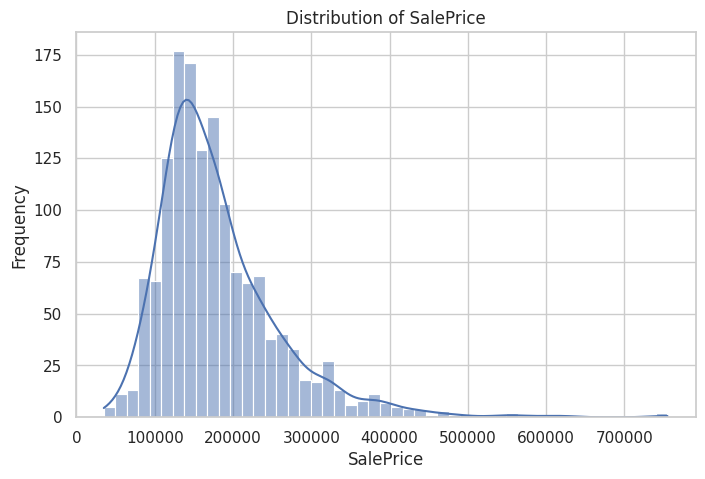

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


The distribution of SalePrice is right-skewed (positivel skewwd),
this means that majorty of houses sold for lower prices, and there are a few houses sold for very high prices, making the average price to be pulled to the right of the peak.
It indicates that most properties are within an affordable range, while a few luxury properties exist.

**Common steps to address this involve applying a logarithmic transformation to the SalePrice variable to make the distribution more symmetrical and normalize the data.**

#Correlation Analysis

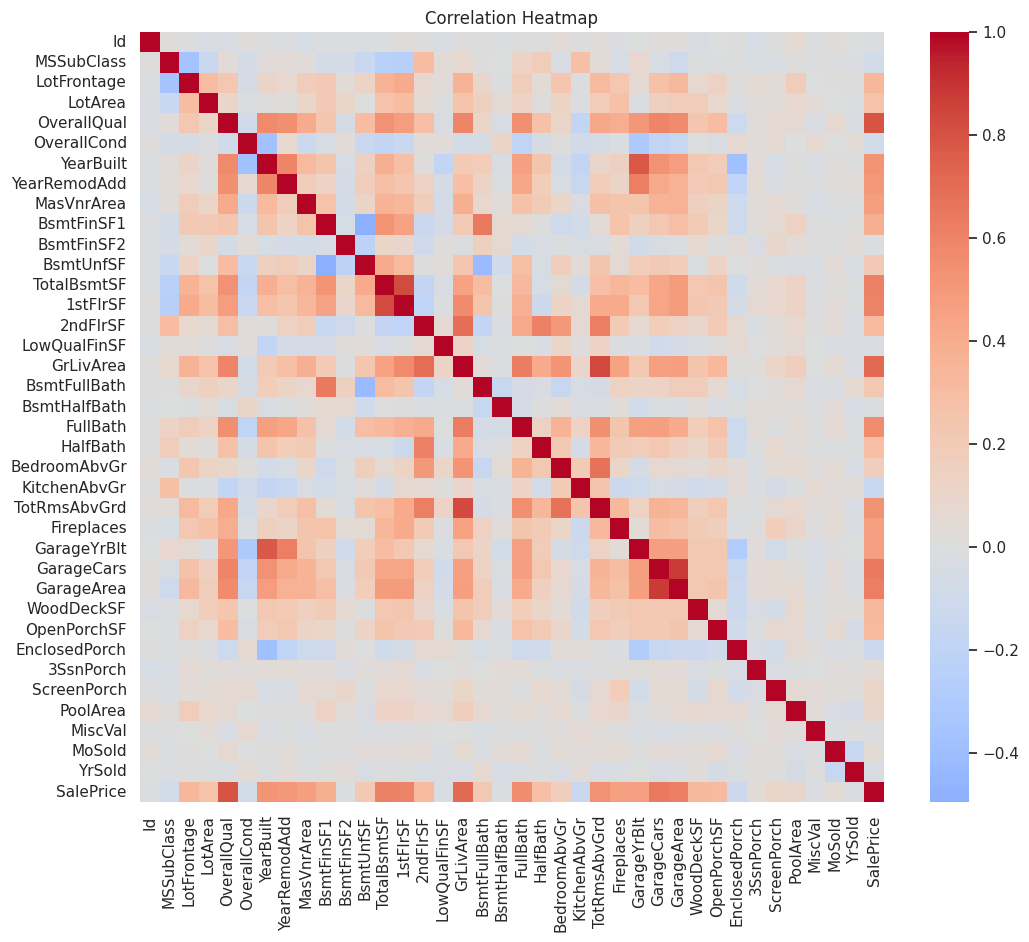

In [72]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


Strong Positive Correlations with SalePrice

The red cells in the SalePrice row highlight features with the strongest positive relationships to house price. These variables are likely to be the most influential predictors:

OverallQual: The strongest single predictor of SalePrice. Homes with higher material and finish quality consistently sell for higher prices.

GrLivArea: Above-grade living area shows a strong positive relationship with the sale price, indicating that larger homes are generally more valuable.

GarageCars and GarageArea: Garage size and capacity are both highly correlated with SalePrice, revealing the value placed on parking and storage space.

TotalBsmtSF &
FullBath: Larger basements ad full baths are also associated with higher house prices.

***Several features are strongly correlated with each other, not just with SalePrice.***

For instance , GarageCars and GarageArea are almost perfectly correlated, suggesting that only one of these features may be needed in a predictive model.

In [73]:
# Top features most correlated with SalePrice
correlation_matrix["SalePrice"].sort_values(ascending=False).head(10)


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


#Key Feature Distributions

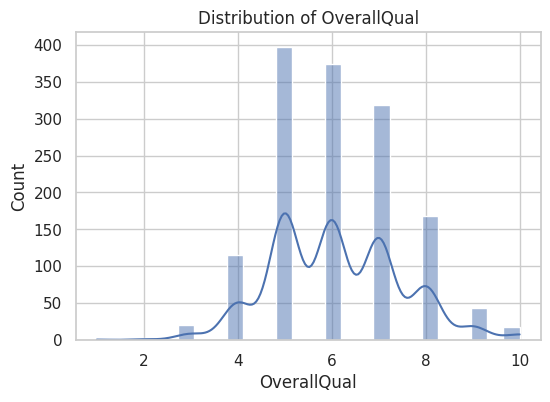

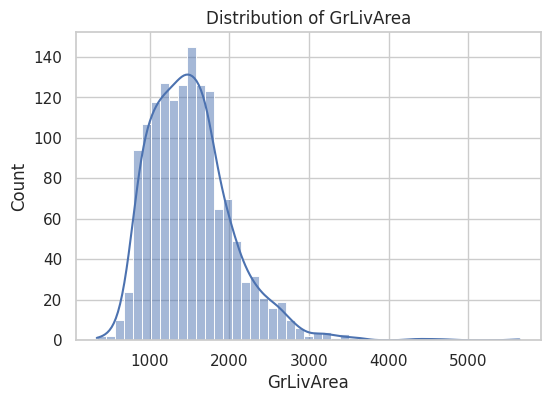

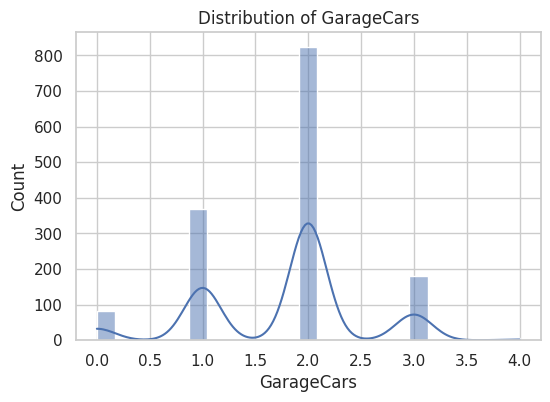

In [74]:
key_features = ["OverallQual","GrLivArea", "GarageCars"]

for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


#Relationship with SalePrice

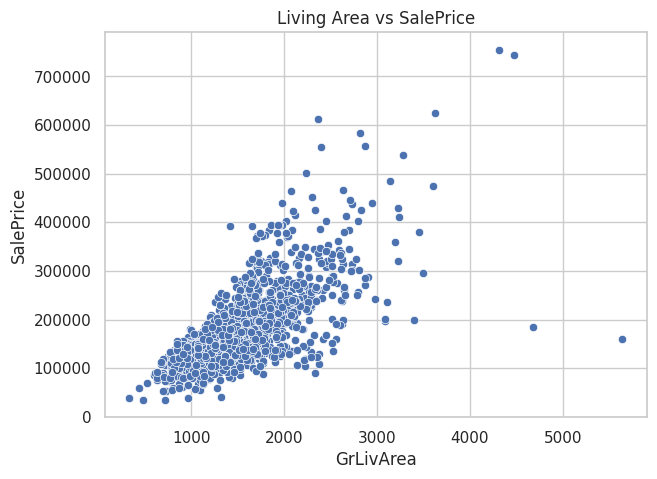

In [61]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("Living Area vs SalePrice")
plt.show()


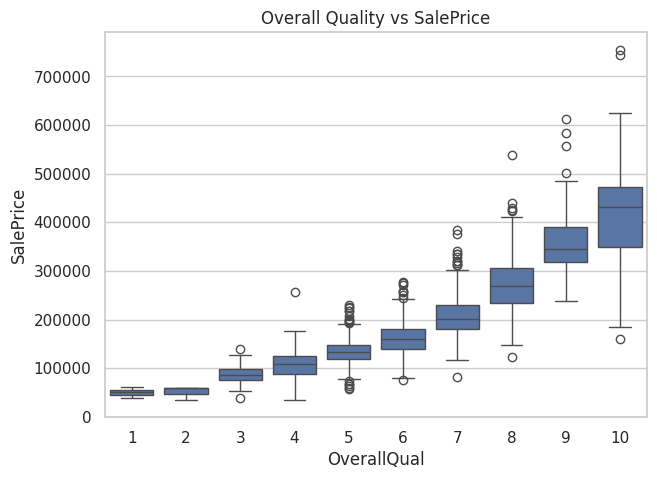

In [62]:
plt.figure(figsize=(7,5))
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("Overall Quality vs SalePrice")
plt.show()


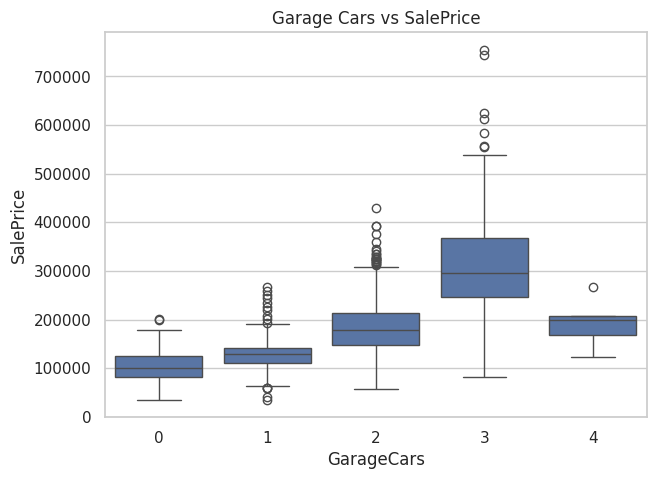

In [63]:
plt.figure(figsize=(7,5))
sns.boxplot(x="GarageCars", y="SalePrice", data=df)
plt.title("Garage Cars vs SalePrice")
plt.show()


#Insights and Interpretation

### Key Factors Influencing House Prices
The provided data confirms and quantifies the visual insights from the correlation heatmap, highlighting the most impactful features on house prices. The top ten correlations validate that property quality and size are the dominant factors influencing SalePrice. For instance, the OverallQual rating has an exceptionally strong positive correlation of 0.79, making it the single most important variable. This is closely followed by metrics of property size, such as GrLivArea (0.71) and TotalBsmtSF (0.61), confirming that larger houses sell for significantly more. Features related to garages (GarageCars at 0.64 and GarageArea at 0.62) also demonstrate a robust relationship with price, often reflecting the overall size and value of the property. Finally, structural components like FullBath (0.56) and YearBuilt (0.52) show moderate to strong positive correlations, indicating that the age and functionality of the house are significant considerations

### Observed Patterns and Issues
- SalePrice is positively skewed
- Some features show multicollinearity: Size-related variables like GarageCars/GarageArea and TotalBsmtSF/1stFlrsF are highly correlated.  Dropping one of the redundant features during modeling would be wise ,  to avoid issues with model stability.
- There are some Outliers in living area

### Recommendations for Future Modelling
- Apply log transformation to SalePrice
- Handle outliers explicitly
- Perform feature engineering (house age, total square footage)
- Drop some features for model training as suggested above ( feature selection or regularization)

In [75]:
# Log-transform the target variable to reduce skewness
df["SalePrice_log"] = np.log1p(df["SalePrice"])


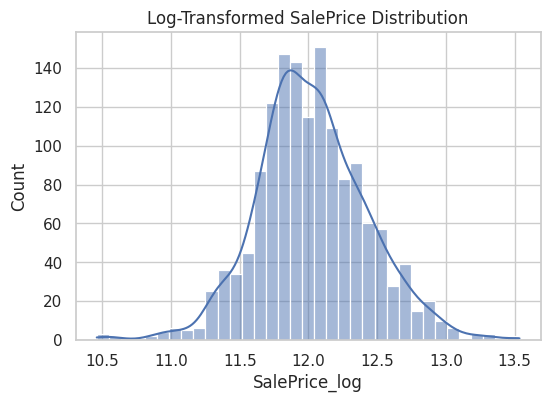

In [76]:
plt.figure(figsize=(6,4))
sns.histplot(df["SalePrice_log"], kde=True)
plt.title("Log-Transformed SalePrice Distribution")
plt.show()


#Selected a small, but meaningful feature set based on the correlation results

In [77]:
baseline_features = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "FullBath",
    "TotalBsmtSF",
    "YearBuilt"
]

#prepae dats for modelling

In [78]:
X = df[baseline_features]
y = df["SalePrice_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [79]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [82]:
# Generate predictions in the log format used by the model
predictions_log_scale = model.predict(X_test)

# Converting log values back to actual dollar amounts (using exponent minus 1)
predicted_prices = np.expm1(predictions_log_scale)
actual_prices = np.expm1(y_test)

# Calculating evaluation metrics on the real price scale
# RMSE tells us the average error in dollars
average_error_dollars = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

# R-squared tells us the percentage of price variation the model explains
model_accuracy_score = r2_score(actual_prices, predicted_prices)

print(f"Average Prediction Error: ${average_error_dollars:,.2f}")
print(f"Model Explanatory Power (R2): {model_accuracy_score:.2%}")


Average Prediction Error: $31,752.22
Model Explanatory Power (R2): 86.86%


#Interpretation of the baseline model
A Linear Regression model was trained using a small set of features identified during EDA as strongly related to SalePrice. The target variable was log-transformed to address skewness observed in the price distribution.
The model achieves an R2 of 86.86%, indicating that these core features capture a significant portion of the variability in house prices. This confirms that the cleaned data contains a strong predictive signal, as the model can explain nearly 87% of the fluctuations in price. On average, the model's predictions deviate from the actual sale price by $31,752.22 (RMSE).
As a baseline model, this result provides a solid reference point for future improvements using feature engineering, regularization, or more advanced algorithms to further reduce the average error.



